En el siguiente notebook, se va a trabajar con los datos con el fin de poder sacar el máximo provecho de los datos de una forma más ordenada, detectando los valores faltantes, los datos duplicados y atípicos para que no afecte de manera negativa al análisis. 


In [1]:
# Se importan las librerías necesarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings

In [2]:
df_conectividad = pd.read_excel('../Data/mapa_conectividad.xlsx')

In [3]:
df_conectividad

,Provincia,Partido,Localidad,Población,ADSL,Cablemódem,Dial Up,Fibra óptica,Satelital,Wireless,Telefonía Fija,3G,4G,Link,Latitud,Longitud
0,BUENOS AIRES,25 de Mayo,25 de Mayo,23408,SI,SI,--,--,SI,SI,SI,SI,SI,6854100.0,-35.433939,-60.173121
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,280,--,--,--,--,--,--,SI,--,--,6854010.0,-35.739217,-60.559063
2,BUENOS AIRES,25 de Mayo,Del Valle,899,SI,--,--,--,SI,--,--,SI,--,6854020.0,-35.897345,-60.731609
3,BUENOS AIRES,25 de Mayo,Ernestina,145,SI,--,--,--,--,--,SI,--,--,6854030.0,-35.270234,-59.557503
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,547,--,--,--,--,--,SI,--,--,--,6854040.0,-35.164397,-60.081358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4300,SANTA FE,General López,Wheelwright,5733,--,SI,--,SI,SI,SI,SI,SI,SI,82042310.0,-33.794294,-61.211441
4301,SANTA FE,General Obligado,Arroyo Ceibal,622,--,--,--,--,--,SI,SI,--,SI,82049010.0,-28.725087,-59.480416
4302,SANTA FE,General Obligado,Avellaneda (Est. Ewald),23341,SI,--,--,SI,--,SI,SI,SI,SI,82049020.0,-29.119366,-59.659251
4303,SANTA FE,General Obligado,Berna,629,--,--,--,--,--,SI,SI,--,SI,82049030.0,-29.275268,-59.847222


In [4]:
# Se realiza una búsqueda de los valores faltantes
valores_faltantes = df_conectividad.isnull().sum()

# Muestra de los valores faltantes
valores_faltantes = valores_faltantes[valores_faltantes > 0]
valores_faltantes


Link    12
dtype: int64

In [5]:
# Verificación de registros duplicados
duplicados = df_conectividad.duplicated().sum()
duplicados

np.int64(0)

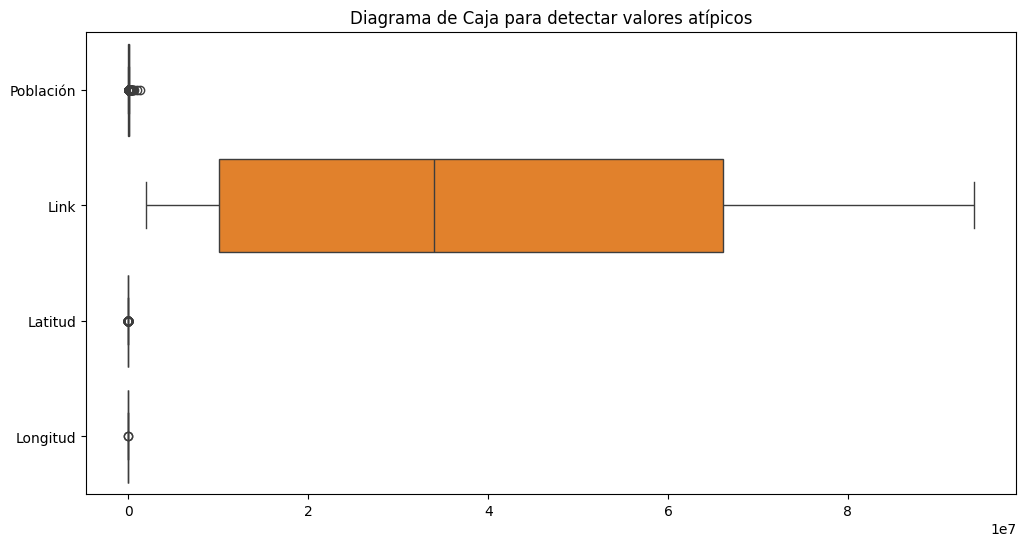

In [6]:
# Crear un boxplot para detectar valores atípicos
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_conectividad, orient='h')
plt.title('Diagrama de Caja para detectar valores atípicos')
plt.show()

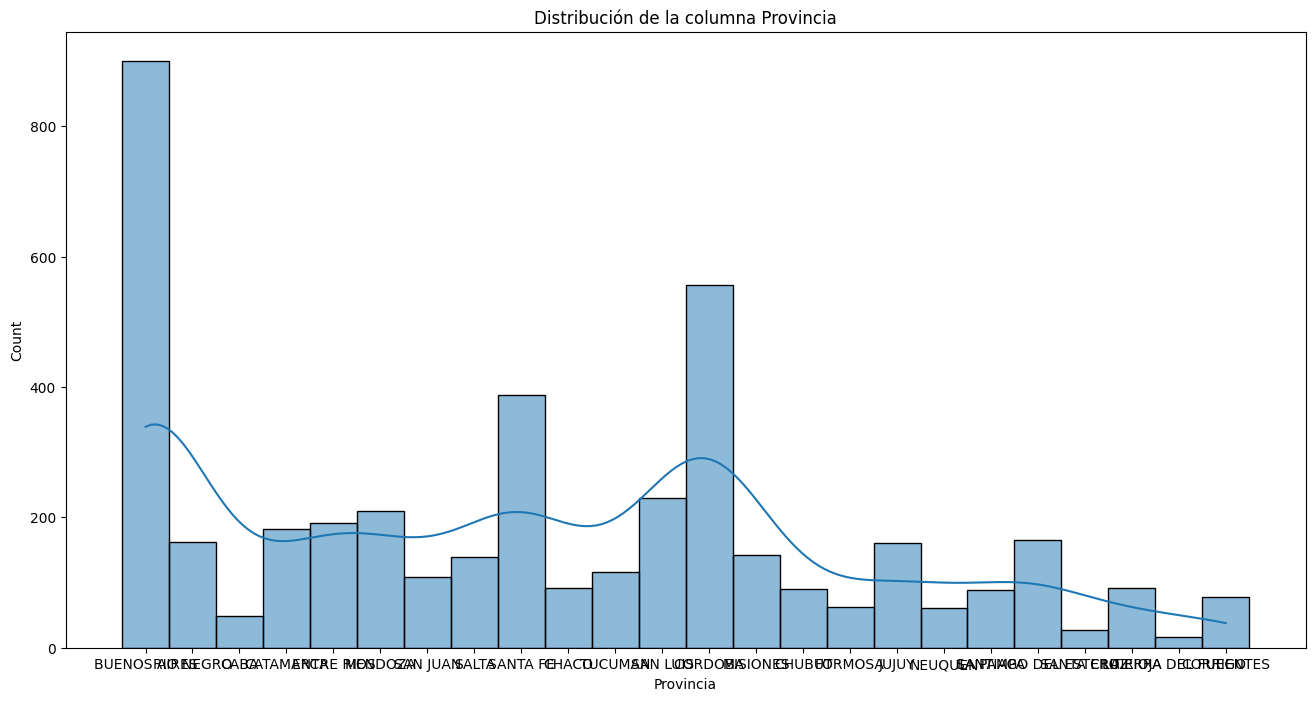

In [7]:
# Histograma de una columna específica
plt.figure(figsize=(16, 8))
sns.histplot(df_conectividad['Provincia'], kde=True)
plt.title('Distribución de la columna Provincia')
plt.show()


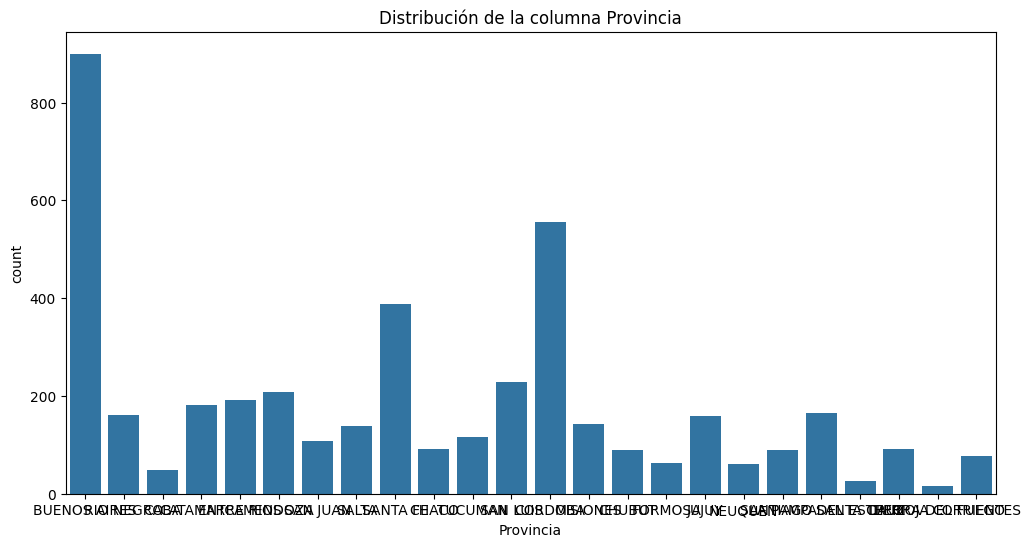

In [8]:
# Conteo de categorías
plt.figure(figsize=(12, 6))
sns.countplot(data=df_conectividad, x='Provincia')
plt.title('Distribución de la columna Provincia')
plt.show()


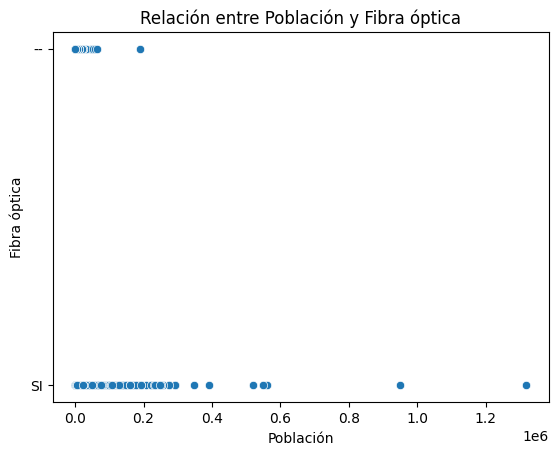

ValueError: could not convert string to float: 'SI'

In [13]:
# Gráfico de dispersión entre Población y Fibra óptica
sns.scatterplot(x='Población', y='Fibra óptica', data=df_conectividad)
plt.xlabel('Población')
plt.ylabel('Fibra óptica')
plt.title('Relación entre Población y Fibra óptica')
plt.show()

# Matriz de correlación
corr = df_conectividad[['Población', 'ADSL', 'Cablemódem', 'Dial Up', 'Fibra óptica', 'Satelital', 'Wireless', 'Telefonía Fija', '3G', '4G']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


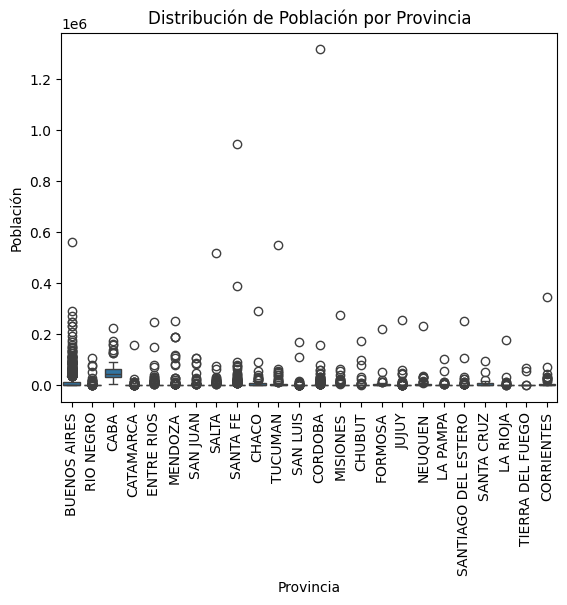

In [14]:
# Comparación de Población entre diferentes Provincias
sns.boxplot(x='Provincia', y='Población', data=df_conectividad)
plt.xticks(rotation=90)
plt.title('Distribución de Población por Provincia')
plt.show()
